# Load Model using pipeline and automodel

In [90]:
from transformers import pipeline

pipe = pipeline('zero-shot-classification','facebook/bart-large-mnli')


In [89]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')
model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large-mnli')

/Users/apple/Desktop/NLP_Projects/venv_ai_app/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [82]:
tokens = tokenizer.encode('Reset my password', "This example is IT issue", return_tensors='pt',truncation_strategy='only_first')
tokens #{'input_ids': [0, 20028, 594, 127, 14844, 2], 'attention_mask': [1, 1, 1, 1, 1, 1]}
# {'input_ids': tensor([[ 0, 20028,  594,   127, 14844,  2, 2, 713,  1246,  16,3779,   696, 2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
tokens.to('cpu')

/Users/apple/Desktop/NLP_Projects/venv_ai_app/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2709: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(


tensor([[    0, 20028,   594,   127, 14844,     2,     2,   713,  1246,    16,
          3779,   696,     2]])

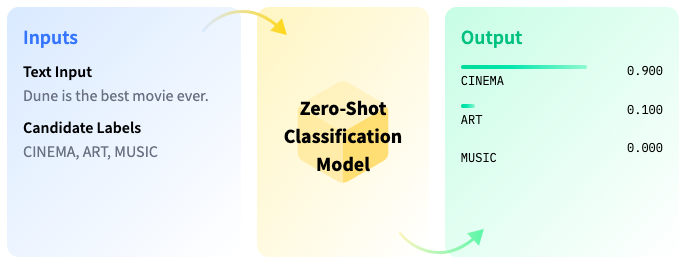

In [80]:
# pose sequence as a NLI premise and label as a hypothesis
from transformers import AutoModelForSequenceClassification, AutoTokenizer
nli_model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large-mnli')
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')
sequence = "one day I will see the world"
label ='cooking'
premise = sequence
hypothesis = f'This example is {label}.'
device ='cpu'
# run through model pre-trained on MNLI
x = tokenizer.encode(premise, hypothesis, return_tensors='pt',
                     truncation_strategy='only_first')
logits = nli_model(x.to(device))[0]
# Doubt

# we throw away "neutral" (dim 1) and take the probability of
# "entailment" (2) as the probability of the label being true 
entail_contradiction_logits = logits[:,[0,2]]
probs = entail_contradiction_logits.softmax(dim=1)
prob_label_is_true = probs[:,1]

# {It issues, news, entertainment}


/Users/apple/Desktop/NLP_Projects/venv_ai_app/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/apple/Desktop/NLP_Projects/venv_ai_app/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2709: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the seco

In [81]:
logits

tensor([[ 2.5710,  1.2230, -3.7365]], grad_fn=<AddmmBackward0>)

In [91]:
entail_contradiction_logits = logits[:,[0,2]]
entail_contradiction_logits

tensor([[ 2.5710, -3.7365]], grad_fn=<IndexBackward0>)

In [92]:
prob = entail_contradiction_logits.softmax(dim=1)

tensor([[0.9982, 0.0018]], grad_fn=<SoftmaxBackward0>)

In [84]:
model(tokens.to('cpu'))[0]

tensor([[-1.7523,  2.6820, -0.9269]], grad_fn=<AddmmBackward0>)

In [83]:
model(tokens.to('cpu'))

Seq2SeqSequenceClassifierOutput(loss=None, logits=tensor([[-1.7523,  2.6820, -0.9269]], grad_fn=<AddmmBackward0>), past_key_values=((tensor([[[[ 3.5664e-01,  3.4130e-01,  2.2136e+00,  ...,  1.1739e+00,
            3.2585e+00, -1.4553e+00],
          [ 3.8734e-01,  4.8377e-01,  2.1573e+00,  ...,  1.6858e+00,
            3.9412e+00, -1.9962e+00],
          [-1.4938e+00,  5.1793e-01, -1.8844e+00,  ..., -2.9711e+00,
           -3.3075e+00, -1.9292e+00],
          ...,
          [-3.6838e+00, -4.6238e+00, -2.7893e+00,  ...,  6.1094e-01,
           -7.3454e+00, -1.2734e+00],
          [-2.2260e+00, -1.3545e+00, -2.4587e-01,  ..., -6.0087e-01,
           -6.9258e+00, -2.9229e-01],
          [-9.3846e-01,  2.5988e-01,  4.8473e-01,  ..., -3.9630e+00,
           -6.0050e+00,  2.7881e-01]],

         [[-2.2513e+00, -2.5750e+00, -1.9645e-01,  ..., -6.4791e-01,
            3.8783e-02,  7.9893e-01],
          [-5.3976e-01, -1.9856e+00, -1.9493e-01,  ..., -1.2245e+00,
            3.7229e-01, -1.5790e

In [48]:
classes = ['IT issue', "News", "Entertainment"]

In [15]:
output = pipe("Reset my password",['IT issue', "News", "Entertainment"])
output

{'sequence': 'Reset my password',
 'labels': ['IT issue', 'Entertainment', 'News'],
 'scores': [0.636796236038208, 0.22437287867069244, 0.13883090019226074]}

# Preprocess output

In [22]:
sub_output={x:output[x] for x in ['labels', 'scores']}
sub_output

{'labels': ['IT issue', 'Entertainment', 'News'],
 'scores': [0.636796236038208, 0.22437287867069244, 0.13883090019226074]}

In [31]:
st_output = dict(zip(output['labels'],output['scores']))
st_output

{'IT issue': 0.636796236038208,
 'Entertainment': 0.22437287867069244,
 'News': 0.13883090019226074}

In [30]:
for i,k in st_output.items():
    print(i,k)

IT issue 0.636796236038208
Entertainment 0.22437287867069244
News 0.13883090019226074


In [11]:
import pandas as pd
df = pd.DataFrame(output)
df

,sequence,labels,scores
0,Reset my password,IT issue,0.636796
1,Reset my password,Entertainment,0.224373
2,Reset my password,News,0.138831


# Load data in excel

In [ ]:
# load excel -- select a ds-- excel file or any ds from HF DS--start with any
# create backend then create frontend


In [35]:
import pandas as pd
df = pd.read_excel("emails_shipping.xlsx")
df.head(3)

,From,To,Date,No_of_Attachments,Attachment_type,Subject,Body,Target
0,John@ABCShipping.com,"SingaporeBooking@wns.com, Shawn@ABCShipping.co...",2020-12-05 00:00:00,0,NaN,Booking Request SIN to AWP RG43423434,Please book our shippment on 20 May SIN to HAM...,Booking
1,John@ABCShipping.com,"SingaporeBooking@wns.com, Shawn@ABCShipping.co...",5/13/2020,0,NaN,Re: Booking Request SIN to AWP RG43423434,Please change Quantity to 10\n\nFrom: Singapor...,Booking Amendment
2,Brenda@JLMLogistics.com,"SingaporeBooking@wns.com, Tony@ABCShipping.com...",4/18/2020,0,NaN,HBL no. 4253554,"Dear All,\nPlease book us on below:\nSingapore...",Booking


In [37]:
df['text']=df['Subject']+'. ' +df['Body']
df.head(3)

,From,To,Date,No_of_Attachments,Attachment_type,Subject,Body,Target,text
0,John@ABCShipping.com,"SingaporeBooking@wns.com, Shawn@ABCShipping.co...",2020-12-05 00:00:00,0,NaN,Booking Request SIN to AWP RG43423434,Please book our shippment on 20 May SIN to HAM...,Booking,Booking Request SIN to AWP RG43423434 Please ...
1,John@ABCShipping.com,"SingaporeBooking@wns.com, Shawn@ABCShipping.co...",5/13/2020,0,NaN,Re: Booking Request SIN to AWP RG43423434,Please change Quantity to 10\n\nFrom: Singapor...,Booking Amendment,Re: Booking Request SIN to AWP RG43423434 Ple...
2,Brenda@JLMLogistics.com,"SingaporeBooking@wns.com, Tony@ABCShipping.com...",4/18/2020,0,NaN,HBL no. 4253554,"Dear All,\nPlease book us on below:\nSingapore...",Booking,"HBL no. 4253554 Dear All,\nPlease book us on ..."


In [60]:
batch_output = pipe(list(df['text'][:3]),classes)
batch_output

[{'sequence': 'Booking Request SIN to AWP  RG43423434 Please book our shippment on 20 May SIN to HAM.\nFREIGHT PREPAID  \nSee details - \nGross Wt. - 205 kgs\nVolume - 0.51 cbm\n',
  'labels': ['News', 'Entertainment', 'IT issue'],
  'scores': [0.5767813324928284, 0.32675623893737793, 0.09646248072385788]},
 {'sequence': 'Re: Booking Request SIN to AWP  RG43423434 Please change Quantity to 10\n\nFrom: SingaporeBooking@wns.com\nDate: 12/5/2020\nTo: John@ABCShipping.com, Shawn@ABCShipping.com, Rav@ECULine.com\nSubject: Re: Booking Request SIN to AWP  RG43423434\n\nHi, \nYour shipment Booked - Booking id - 12121212\n\nFrom: John@ABCShipping.com\nDate: 12/5/2020\nTo: SingaporeBooking@wns.com, Shawn@ABCShipping.com, Rav@ECULine.com\nSubject: Booking Request SIN to AWP  \n\n\nPlease book our shippment on 20 May SIN to HAM.\nFREIGHT PREPAID  \nSee details - \nGross Wt. - 205 kgs\nVolume - 0.51 cbm\n',
  'labels': ['News', 'Entertainment', 'IT issue'],
  'scores': [0.5460141897201538, 0.331703

In [61]:
batch_output['label']

TypeError: list indices must be integers or slices, not str

In [62]:
[i['labels'][0] for i in batch_output]

['News', 'News', 'News']

In [65]:
df1 = df[:3]
df1['predicted']=[i['labels'][0] for i in batch_output]
df1

/var/folders/m_/_x8t4kvn0334z53zdz_86l400000gp/T/ipykernel_56480/2521900963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted']=[i['labels'][0] for i in batch_output]


,From,To,Date,No_of_Attachments,Attachment_type,Subject,Body,Target,text,predicted
0,John@ABCShipping.com,"SingaporeBooking@wns.com, Shawn@ABCShipping.co...",2020-12-05 00:00:00,0,NaN,Booking Request SIN to AWP RG43423434,Please book our shippment on 20 May SIN to HAM...,Booking,Booking Request SIN to AWP RG43423434 Please ...,News
1,John@ABCShipping.com,"SingaporeBooking@wns.com, Shawn@ABCShipping.co...",5/13/2020,0,NaN,Re: Booking Request SIN to AWP RG43423434,Please change Quantity to 10\n\nFrom: Singapor...,Booking Amendment,Re: Booking Request SIN to AWP RG43423434 Ple...,News
2,Brenda@JLMLogistics.com,"SingaporeBooking@wns.com, Tony@ABCShipping.com...",4/18/2020,0,NaN,HBL no. 4253554,"Dear All,\nPlease book us on below:\nSingapore...",Booking,"HBL no. 4253554 Dear All,\nPlease book us on ...",News


In [57]:
for i in df['text'][:3]:# Doubt : How to check what parameters go in an object of another object: How to check if pipe takes in str only of list of str
    # pipe(i)
    print(i)
    print("---------")

Booking Request SIN to AWP  RG43423434 Please book our shippment on 20 May SIN to HAM.
FREIGHT PREPAID  
See details - 
Gross Wt. - 205 kgs
Volume - 0.51 cbm

---------
Re: Booking Request SIN to AWP  RG43423434 Please change Quantity to 10

From: SingaporeBooking@wns.com
Date: 12/5/2020
To: John@ABCShipping.com, Shawn@ABCShipping.com, Rav@ECULine.com
Subject: Re: Booking Request SIN to AWP  RG43423434

Hi, 
Your shipment Booked - Booking id - 12121212

From: John@ABCShipping.com
Date: 12/5/2020
To: SingaporeBooking@wns.com, Shawn@ABCShipping.com, Rav@ECULine.com
Subject: Booking Request SIN to AWP  


Please book our shippment on 20 May SIN to HAM.
FREIGHT PREPAID  
See details - 
Gross Wt. - 205 kgs
Volume - 0.51 cbm

---------
HBL  no. 4253554 Dear All,
Please book us on below:
Singapore / Chennai
5 Packages / 45.3 kg / 0.33 M3
Freight Paid
Electrical parts
---------


In [56]:
[df['text'][:3]]

[0    Booking Request SIN to AWP  RG43423434 Please ...
 1    Re: Booking Request SIN to AWP  RG43423434 Ple...
 2    HBL  no. 4253554 Dear All,\nPlease book us on ...
 Name: text, dtype: object]

# Rough Work

In [73]:
print(pipe.framework)
print(pipe.model)

pt
BartForSequenceClassification(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm)

In [87]:
pipe.model.config

BartConfig {
  "_name_or_path": "facebook/bart-large-mnli",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_final_layer_norm": false,
  "architectures": [
    "BartForSequenceClassification"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "contradiction",
    "1": "neutral",
    "2": "entailment"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "contradiction": 0,
    "entailment": 2,
    "neutral": 1
  },
  "max_position_embeddings": 1024,
  "model_type": "bart",
  

In [88]:
model.config

BartConfig {
  "_name_or_path": "facebook/bart-large-mnli",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_final_layer_norm": false,
  "architectures": [
    "BartForSequenceClassification"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "contradiction",
    "1": "neutral",
    "2": "entailment"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "contradiction": 0,
    "entailment": 2,
    "neutral": 1
  },
  "max_position_embeddings": 1024,
  "model_type": "bart",
  